In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import cdist
from sklearn.cluster import MeanShift, estimate_bandwidth
from itertools import cycle
from sklearn.cluster import Birch

In [95]:
df = pd.read_csv('../../data/cleaned data/Music Survey Cleaned.csv')
df = df.drop('Unnamed: 0',axis = 1)


In [96]:
print(df.columns)
df = df.replace('I do not use a streaming service.','N/A')
df = df.replace('Other streaming service','Others')
print(df['Primary streaming service'].unique())
print(df['Music effects'].unique())


Index(['Age', 'Primary streaming service', 'Hours per day', 'Anxiety',
       'Depression', 'Insomnia', 'OCD', 'Music effects'],
      dtype='object')
['Spotify' 'YouTube Music' 'N/A' 'Apple Music' 'Others' 'Pandora']
['No effect' 'Improve' 'Worsen']


<AxesSubplot:xlabel='Music effects', ylabel='count'>

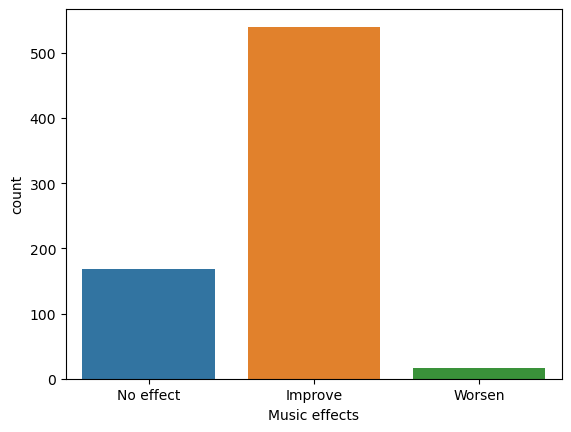

In [97]:
sns.countplot(x = 'Music effects', data = df)

<AxesSubplot:xlabel='Primary streaming service', ylabel='count'>

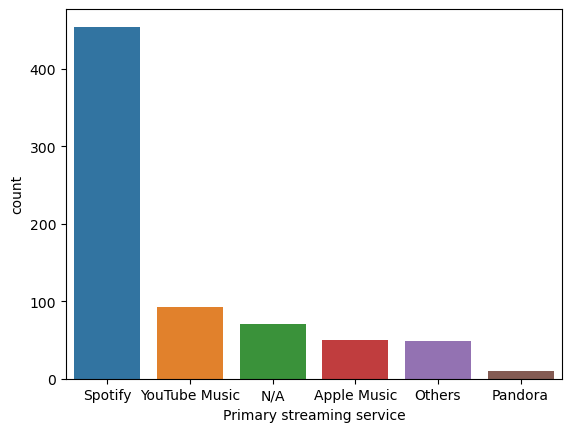

In [98]:
sns.countplot(x = 'Primary streaming service', data = df)

<AxesSubplot:xlabel='Hours per day', ylabel='Age'>

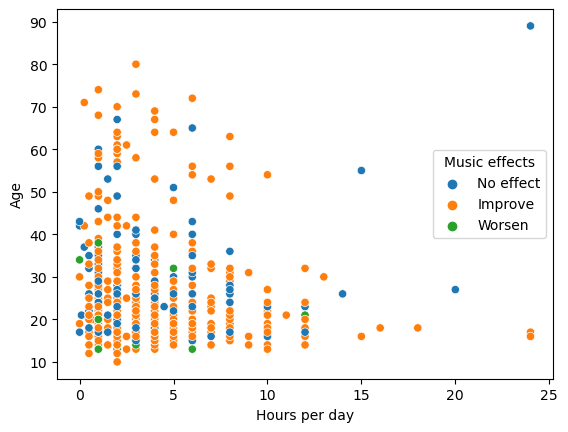

In [99]:
sns.scatterplot(x= 'Hours per day', y = 'Age', hue = 'Music effects', data = df)


In [100]:
df['Primary streaming service'] = df['Primary streaming service'].astype('category').cat.codes
df['Music effects'] = df['Music effects'].astype('category').cat.codes
df

,Age,Primary streaming service,Hours per day,Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,4,4.0,7.0,7.0,10.0,2.0,1
1,61.0,5,2.5,9.0,7.0,3.0,3.0,0
2,18.0,4,4.0,7.0,2.0,5.0,9.0,0
3,18.0,4,5.0,8.0,8.0,7.0,7.0,0
4,18.0,5,3.0,4.0,8.0,6.0,0.0,0
...,...,...,...,...,...,...,...,...
721,17.0,4,2.0,7.0,6.0,0.0,9.0,0
722,18.0,4,1.0,3.0,2.0,2.0,5.0,0
723,19.0,2,6.0,2.0,2.0,2.0,2.0,0
724,19.0,4,5.0,2.0,3.0,2.0,1.0,0


In [101]:
# seperate the dataset into features and labels
X = df.drop(['Music effects'],axis=1)
y = df['Music effects']

normalize = StandardScaler()
normalize.fit(X)
X = normalize.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [102]:
#k-means
distortion = []
inertias = []
k = 11

for k in range(1,k):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X)

    distortion.append(sum(np.min(cdist(X,kmeans.cluster_centers_, 'euclidean'), axis = 1)) / X.shape[0])
    inertias.append(kmeans.inertia_)
    evaluation = pd.DataFrame.from_records({'Cluster':np.arange(1,k+1),'Distortion':distortion,'Inertia':inertias})

evaluation

,Cluster,Distortion,Inertia
0,1,2.495406,5082.000000
1,2,2.205227,4042.262405
2,3,2.080931,3564.819095
3,4,1.956789,3170.395383
4,5,1.857201,2883.193644
5,6,1.791784,2638.287431
6,7,1.727518,2474.765512
7,8,1.684337,2350.364865
8,9,1.647566,2263.691733
9,10,1.613907,2161.071047


<AxesSubplot:xlabel='Cluster', ylabel='Inertia'>

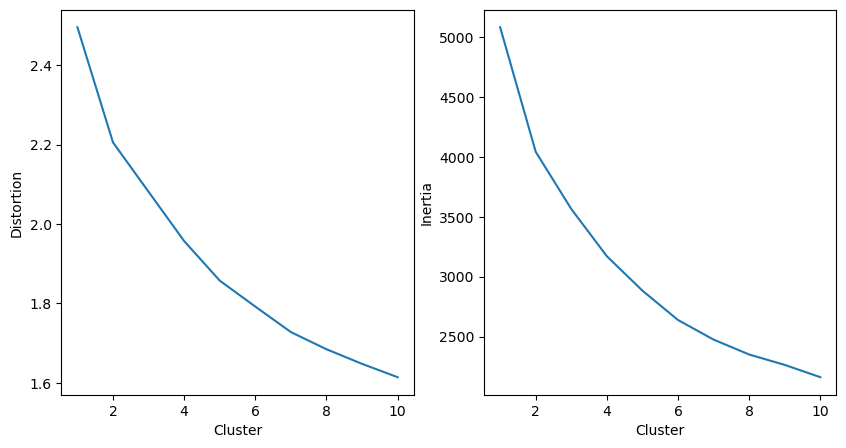

In [111]:
# for k means clustering we will use the elbow method to find the optimal number of clusters. we will use the inertia_ attribute to find the sum of squared distances of samples to their closest cluster center. we will use the range of 1 to 10 clusters. plot the inertia_ values for each number of clusters. make sure to save it in a dataframe and plot it using matplotlib
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.lineplot(x = 'Cluster', y = 'Distortion', data = evaluation,ax=ax[0])
sns.lineplot(x = 'Cluster', y = 'Inertia', data = evaluation,ax=ax[1])

<AxesSubplot:xlabel='Hours per day', ylabel='Age'>

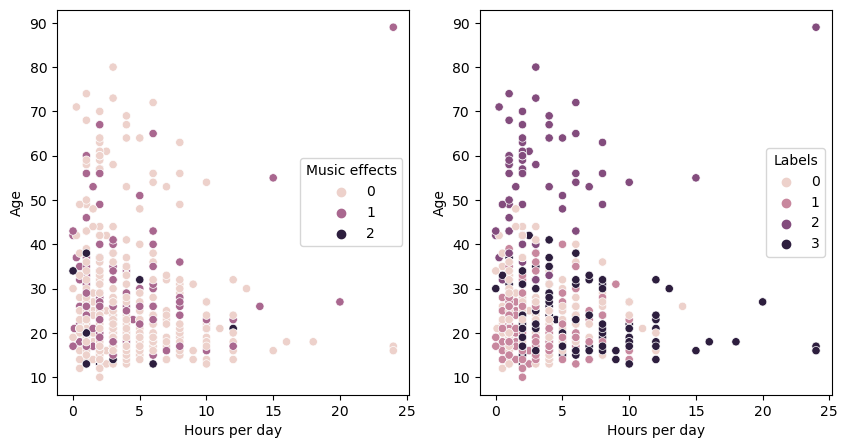

In [110]:
# plot distortion and inertia for kmeans, you can either plot them seperately or use fig, ax = plt.subplots(1, 2) to plot them in the same figure. Suggest the optimal number of clusters based on the plot.
bestK = KMeans(n_clusters=4, init='k-means++')
labelsKM =bestK.fit_predict(X)
df['Labels'] = labelsKM
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(x= 'Hours per day', y = 'Age', hue = 'Music effects', data = df, ax=ax[0])
sns.scatterplot(x= 'Hours per day', y = 'Age',hue='Labels',data=df, ax=ax[1])

In [124]:
# perform DBSCAN clustering. use the eps and min_samples parameters to find the optimal number of clusters. plot the number of clusters vs the silhouette score. Suggest the optimal number of clusters based on the plot.

model = DBSCAN(eps = 0.5, min_samples = 10).fit(X)
labelsDB = model.labels_
df['LabelsDB'] = labelsDB
df['LabelsDB']

0     -1
1     -1
2     -1
3     -1
4     -1
      ..
721   -1
722   -1
723   -1
724   -1
725   -1
Name: LabelsDB, Length: 726, dtype: int64

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(5,10))
sns.scatterplot(x= 'Hours per day', y = 'Age', hue = 'Music effects', data = df, ax=ax[0])
sns.scatterplot(x= 'Hours per day', y = 'Age', hue='labelsDB',data=df, ax=ax[1])

<AxesSubplot:xlabel='Hours per day', ylabel='Age'>

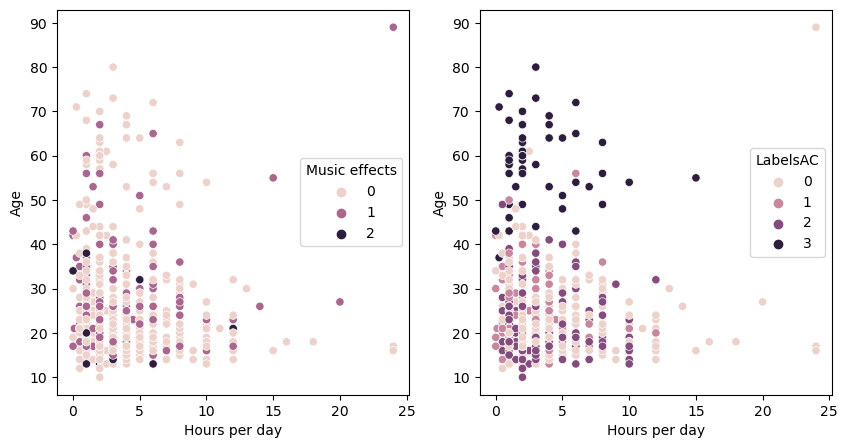

In [125]:
model = AgglomerativeClustering(n_clusters = 4).fit(X)
labelsAC = model.labels_
df['LabelsAC'] = labelsAC
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(x= 'Hours per day', y = 'Age', hue = 'Music effects', data = df, ax=ax[0])
sns.scatterplot(x= 'Hours per day', y = 'Age',hue='LabelsAC',data=df, ax=ax[1])

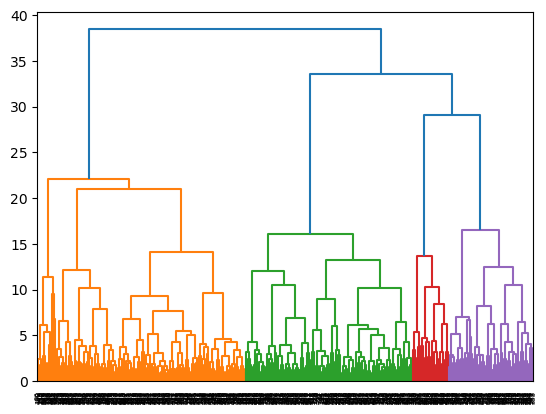

In [126]:
linkage = linkage(X, method = 'ward')
dendrogram = dendrogram(linkage)
#optimal number =4